In [32]:
import onnxruntime as ort
import numpy as np
import matplotlib.pyplot as plt
import torch
from torchvision.utils import draw_bounding_boxes
from torchvision.transforms.v2.functional import to_pil_image
import cv2 as cv

In [5]:
mean = np.array([0.485, 0.456, 0.406])
std = np.array([0.229, 0.224, 0.225])

In [4]:
img = cv.imread('./data/example.jpg')
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
img = cv.resize(img, (640, 640))
img.shape

(640, 640, 3)

In [7]:
model_in = img / 255.0
model_in = (model_in - mean) / std
model_in = model_in.transpose((2, 0, 1))
model_in = np.expand_dims(model_in, 0).astype(np.float32)
model_in.shape

(1, 3, 640, 640)

In [57]:
ort_session = ort.InferenceSession('./out/onnx/rtdetr_resnet101.onnx')

In [58]:
classes, boxes, confs = ort_session.run(None, {'images': model_in, 'orig_target_sizes': np.array([[640, 640]])})
keep = confs > .25

classes = classes[keep]
boxes = boxes[keep]
confs = confs[keep]

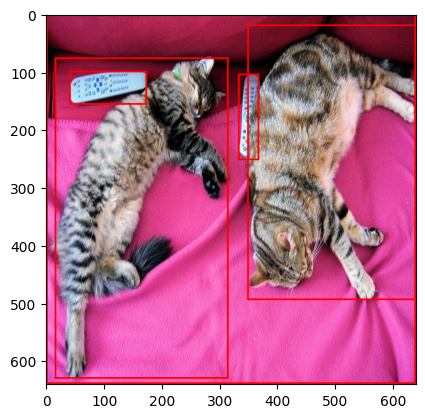

In [59]:
img_with_boxes = draw_bounding_boxes(torch.tensor(img.transpose((2, 0, 1))), torch.tensor(boxes), colors="red", width=3)
plt.imshow(to_pil_image(img_with_boxes))
plt.show()